In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

%matplotlib inline
#some comments added

# Time series

In [2]:
df = pd.DataFrame(np.random.randn(70, 4),
      index = pd.date_range('1/12/2020', periods=70),
      columns = ['A', 'B','C','D'])
df['big'] = 0
df.loc[df['A'] > 0.9, 'big'] = 1 #set some 'big' numbers class
df = df.reset_index()

## time in Pandas

In [3]:
ts = df.copy()

In [5]:
ts[:2]

,index,A,B,C,D,big
0,2020-01-12,0.903137,0.767938,1.197656,1.046922,1
1,2020-01-13,-1.321658,-1.015627,-0.369260,0.283140,0


In [7]:
ts.dtypes

index    datetime64[ns]
A               float64
B               float64
C               float64
D               float64
big               int64
dtype: object

In [31]:
ts['date'] = pd.to_datetime(ts['index'])
ts

,index,A,B,C,D,big,date
0,2020-01-12,-0.164797,-0.913730,1.615179,-0.841465,0,2020-01-12
1,2020-01-13,0.635384,-0.219110,-0.162158,0.472837,0,2020-01-13
2,2020-01-14,-0.558807,-0.463541,0.845003,-1.058322,0,2020-01-14
3,2020-01-15,2.828782,0.248797,-0.148115,0.184571,1,2020-01-15
4,2020-01-16,1.478784,-0.167169,-0.214027,-1.016374,1,2020-01-16
...,...,...,...,...,...,...,...
65,2020-03-17,-0.558682,0.609432,-1.210470,-0.149218,0,2020-03-17
66,2020-03-18,0.678009,0.939057,0.452047,0.484682,0,2020-03-18
67,2020-03-19,1.359149,-2.075404,-0.963267,0.174780,1,2020-03-19
68,2020-03-20,-0.281502,-0.979848,-1.299677,2.228566,0,2020-03-20


In [33]:
ts.date[2] #look at cell#2

Timestamp('2020-01-14 00:00:00')

In [34]:
type(ts.date[2])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
pd.to_datetime('1991-09-01')

Timestamp('1991-09-01 00:00:00')

In [14]:
s1 = pd.to_datetime(['2/5-10'], format='%d/%m-%y')

In [15]:
s1

DatetimeIndex(['2010-05-02'], dtype='datetime64[ns]', freq=None)

In [16]:
s2 = pd.to_datetime(['2/5-10'], format='%m/%d-%y')

In [17]:
s2

DatetimeIndex(['2010-02-05'], dtype='datetime64[ns]', freq=None)

In [18]:
dtime.month, dtime.day, dtime.year

(1, 1, 1970)

### timedelta

In [19]:
s = pd.Series(pd.date_range('2012-1-1', periods=3, freq='D'))
td = pd.Series([ pd.Timedelta(days=i) for i in range(3) ])
df = pd.DataFrame(dict(A = s, B = td))
df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [20]:
df.B[2] #timedelta

Timedelta('2 days 00:00:00')

In [21]:
df.B[2]+s2 #add timedelta to date

DatetimeIndex(['2010-02-07'], dtype='datetime64[ns]', freq=None)

In [22]:
between_days = s2-s1 #operations with dates
between_days, s2, s1

(TimedeltaIndex(['-86 days'], dtype='timedelta64[ns]', freq=None),
 DatetimeIndex(['2010-02-05'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2010-05-02'], dtype='datetime64[ns]', freq=None))

In [24]:
df.A.shift(-1) # produces NaT (time NaN)

0   2012-01-02
1   2012-01-03
2          NaT
Name: A, dtype: datetime64[ns]

In [25]:
df.A + pd.DateOffset(days=1) # clean, no NaN

0   2012-01-02
1   2012-01-03
2   2012-01-04
Name: A, dtype: datetime64[ns]

## time in Python: datetime

In [35]:
from datetime import datetime, timedelta

In [36]:
d = datetime.today() + timedelta(hours=6, minutes=50)
d.strftime('%H:%M %p')

'17:19 PM'

### back to time series column in Pandas

In [37]:
ts

,index,A,B,C,D,big,date
0,2020-01-12,-0.164797,-0.913730,1.615179,-0.841465,0,2020-01-12
1,2020-01-13,0.635384,-0.219110,-0.162158,0.472837,0,2020-01-13
2,2020-01-14,-0.558807,-0.463541,0.845003,-1.058322,0,2020-01-14
3,2020-01-15,2.828782,0.248797,-0.148115,0.184571,1,2020-01-15
4,2020-01-16,1.478784,-0.167169,-0.214027,-1.016374,1,2020-01-16
...,...,...,...,...,...,...,...
65,2020-03-17,-0.558682,0.609432,-1.210470,-0.149218,0,2020-03-17
66,2020-03-18,0.678009,0.939057,0.452047,0.484682,0,2020-03-18
67,2020-03-19,1.359149,-2.075404,-0.963267,0.174780,1,2020-03-19
68,2020-03-20,-0.281502,-0.979848,-1.299677,2.228566,0,2020-03-20


In [38]:
ts.dtypes

index    datetime64[ns]
A               float64
B               float64
C               float64
D               float64
big               int64
date     datetime64[ns]
dtype: object

In [39]:
ts.set_index('date')

,index,A,B,C,D,big
date,,,,,,
2020-01-12,2020-01-12,-0.164797,-0.913730,1.615179,-0.841465,0
2020-01-13,2020-01-13,0.635384,-0.219110,-0.162158,0.472837,0
2020-01-14,2020-01-14,-0.558807,-0.463541,0.845003,-1.058322,0
2020-01-15,2020-01-15,2.828782,0.248797,-0.148115,0.184571,1
2020-01-16,2020-01-16,1.478784,-0.167169,-0.214027,-1.016374,1
...,...,...,...,...,...,...
2020-03-17,2020-03-17,-0.558682,0.609432,-1.210470,-0.149218,0
2020-03-18,2020-03-18,0.678009,0.939057,0.452047,0.484682,0
2020-03-19,2020-03-19,1.359149,-2.075404,-0.963267,0.174780,1


In [40]:
ts # not saved!

,index,A,B,C,D,big,date
0,2020-01-12,-0.164797,-0.913730,1.615179,-0.841465,0,2020-01-12
1,2020-01-13,0.635384,-0.219110,-0.162158,0.472837,0,2020-01-13
2,2020-01-14,-0.558807,-0.463541,0.845003,-1.058322,0,2020-01-14
3,2020-01-15,2.828782,0.248797,-0.148115,0.184571,1,2020-01-15
4,2020-01-16,1.478784,-0.167169,-0.214027,-1.016374,1,2020-01-16
...,...,...,...,...,...,...,...
65,2020-03-17,-0.558682,0.609432,-1.210470,-0.149218,0,2020-03-17
66,2020-03-18,0.678009,0.939057,0.452047,0.484682,0,2020-03-18
67,2020-03-19,1.359149,-2.075404,-0.963267,0.174780,1,2020-03-19
68,2020-03-20,-0.281502,-0.979848,-1.299677,2.228566,0,2020-03-20


In [41]:
ts.set_index('date', inplace=True) #now MAYBE saved; >ts = ts.set_index('date') # saved for sure!

In [42]:
ts

,index,A,B,C,D,big
date,,,,,,
2020-01-12,2020-01-12,-0.164797,-0.913730,1.615179,-0.841465,0
2020-01-13,2020-01-13,0.635384,-0.219110,-0.162158,0.472837,0
2020-01-14,2020-01-14,-0.558807,-0.463541,0.845003,-1.058322,0
2020-01-15,2020-01-15,2.828782,0.248797,-0.148115,0.184571,1
2020-01-16,2020-01-16,1.478784,-0.167169,-0.214027,-1.016374,1
...,...,...,...,...,...,...
2020-03-17,2020-03-17,-0.558682,0.609432,-1.210470,-0.149218,0
2020-03-18,2020-03-18,0.678009,0.939057,0.452047,0.484682,0
2020-03-19,2020-03-19,1.359149,-2.075404,-0.963267,0.174780,1


In [44]:
data_daily = ts

In [45]:
data_daily

,index,A,B,C,D,big
date,,,,,,
2020-01-12,2020-01-12,-0.164797,-0.913730,1.615179,-0.841465,0
2020-01-13,2020-01-13,0.635384,-0.219110,-0.162158,0.472837,0
2020-01-14,2020-01-14,-0.558807,-0.463541,0.845003,-1.058322,0
2020-01-15,2020-01-15,2.828782,0.248797,-0.148115,0.184571,1
2020-01-16,2020-01-16,1.478784,-0.167169,-0.214027,-1.016374,1
...,...,...,...,...,...,...
2020-03-17,2020-03-17,-0.558682,0.609432,-1.210470,-0.149218,0
2020-03-18,2020-03-18,0.678009,0.939057,0.452047,0.484682,0
2020-03-19,2020-03-19,1.359149,-2.075404,-0.963267,0.174780,1


In [46]:
data_daily.index.day_name() #extract info

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object', name='date')

In [47]:
ts['now_date'] = ts.index #inheritage of a type

In [48]:
ts.dtypes

index       datetime64[ns]
A                  float64
B                  float64
C                  float64
D                  float64
big                  int64
now_date    datetime64[ns]
dtype: object

In [49]:
ts.now_date[3].day_name()

'Wednesday'

### why indexing

In [51]:
ts.loc['2020-03'] # find the date

,index,A,B,C,D,big,now_date
date,,,,,,,
2020-03-01,2020-03-01,0.161912,0.350041,-1.137627,1.752009,0,2020-03-01
2020-03-02,2020-03-02,-1.669935,-0.013850,1.337160,0.195308,0,2020-03-02
2020-03-03,2020-03-03,-1.071334,0.949609,0.748174,0.549702,0,2020-03-03
2020-03-04,2020-03-04,-1.214723,-1.151790,0.358635,-0.061349,0,2020-03-04
2020-03-05,2020-03-05,-1.397771,0.600060,-0.139516,-1.248772,0,2020-03-05
2020-03-06,2020-03-06,1.157877,1.013945,0.246303,1.064161,1,2020-03-06
2020-03-07,2020-03-07,0.323559,0.338083,-0.045081,-0.117102,0,2020-03-07
2020-03-08,2020-03-08,2.049044,-0.044540,-0.982498,-1.926382,1,2020-03-08
2020-03-09,2020-03-09,-0.960672,-0.451859,0.137234,-0.251466,0,2020-03-09


In [52]:
ts[ts.index.isin(pd.date_range("2020-01-11", "2020-02-07"))] #many filtering possibilities

,index,A,B,C,D,big,now_date
date,,,,,,,
2020-01-12,2020-01-12,-0.164797,-0.913730,1.615179,-0.841465,0,2020-01-12
2020-01-13,2020-01-13,0.635384,-0.219110,-0.162158,0.472837,0,2020-01-13
2020-01-14,2020-01-14,-0.558807,-0.463541,0.845003,-1.058322,0,2020-01-14
2020-01-15,2020-01-15,2.828782,0.248797,-0.148115,0.184571,1,2020-01-15
2020-01-16,2020-01-16,1.478784,-0.167169,-0.214027,-1.016374,1,2020-01-16
2020-01-17,2020-01-17,-0.197348,1.149200,0.072436,0.924650,0,2020-01-17
2020-01-18,2020-01-18,1.375069,-0.322160,-1.021053,1.207903,1,2020-01-18
2020-01-19,2020-01-19,-0.086043,1.745776,-1.664594,-1.280963,0,2020-01-19
2020-01-20,2020-01-20,-1.605201,0.208965,0.064334,-0.725590,0,2020-01-20


### plot time series

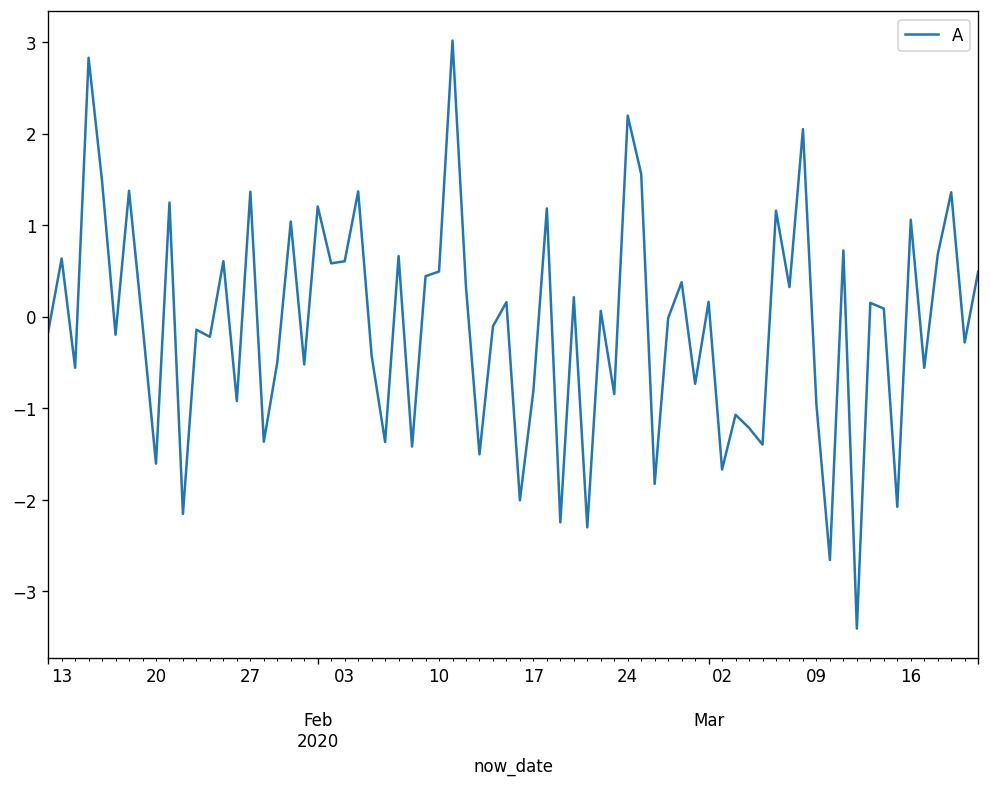

In [54]:
ts.plot(x = 'now_date', y='A')
plt.show()

# Time series analysis

In [55]:
#Australian Drug Sales data, free available dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [56]:
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

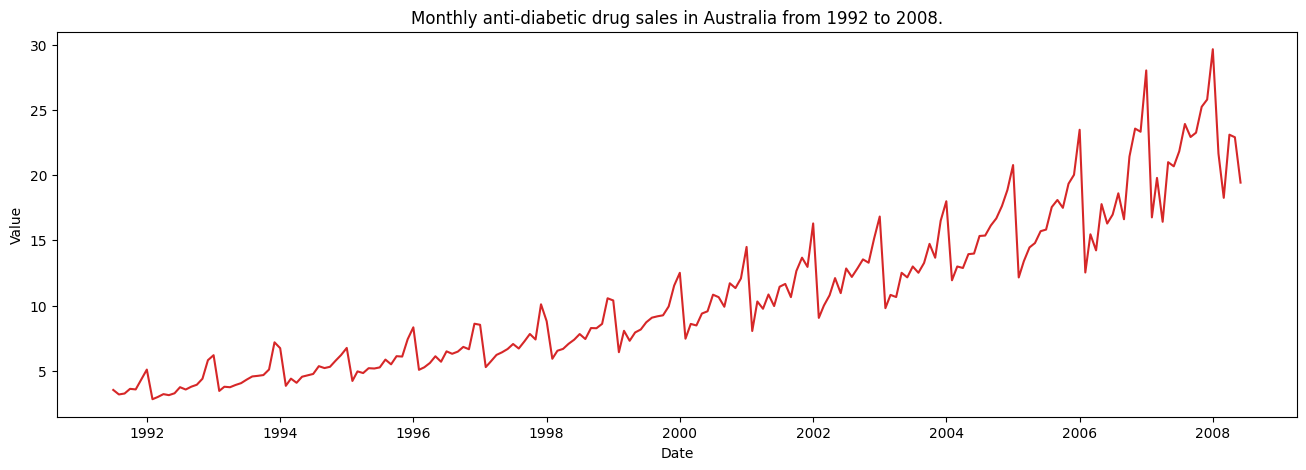

In [57]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.date, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

### Seasonality

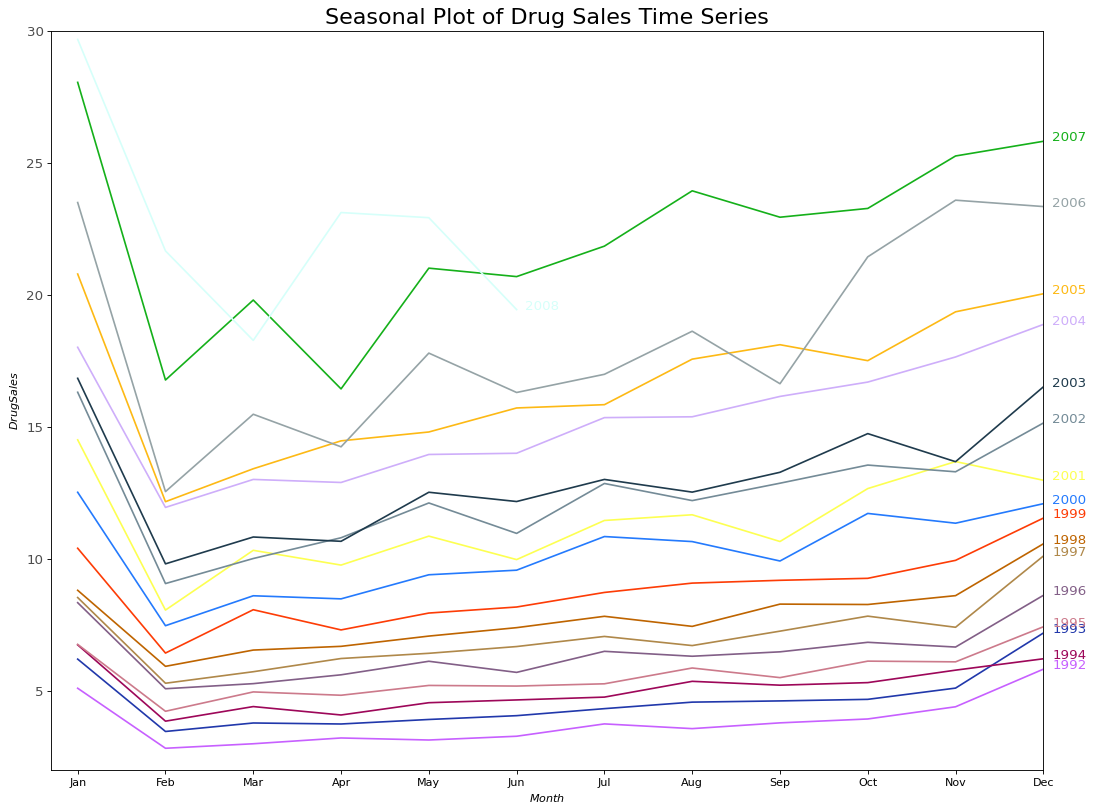

In [58]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

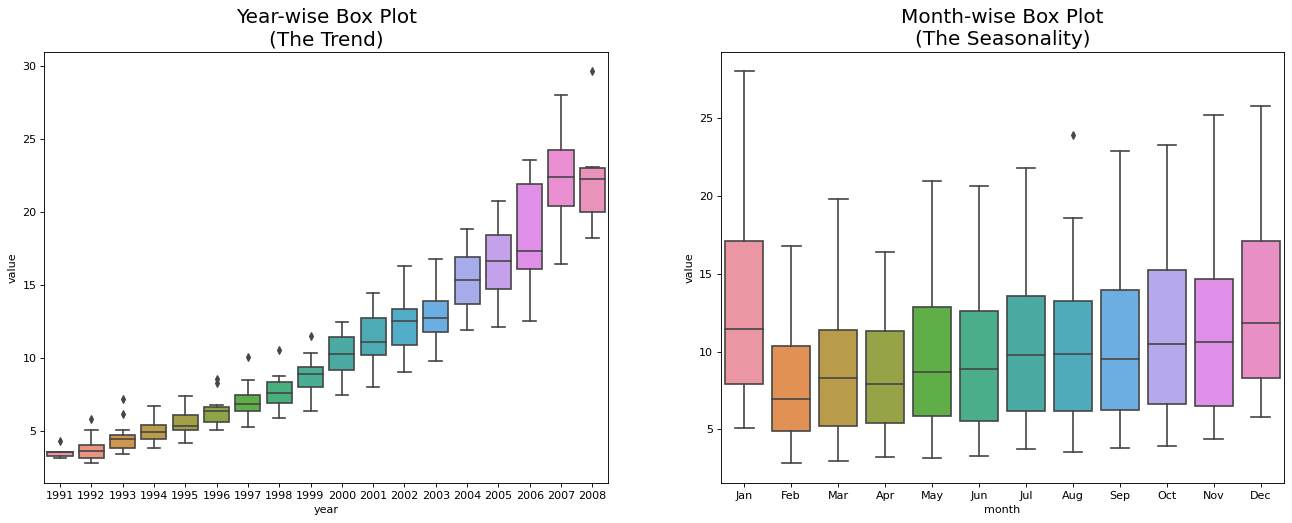

In [59]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [61]:
df

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [62]:
df = df.set_index('date')

### Multiplicative Time Series:
### Value = Base Level x Trend x Seasonality x Error

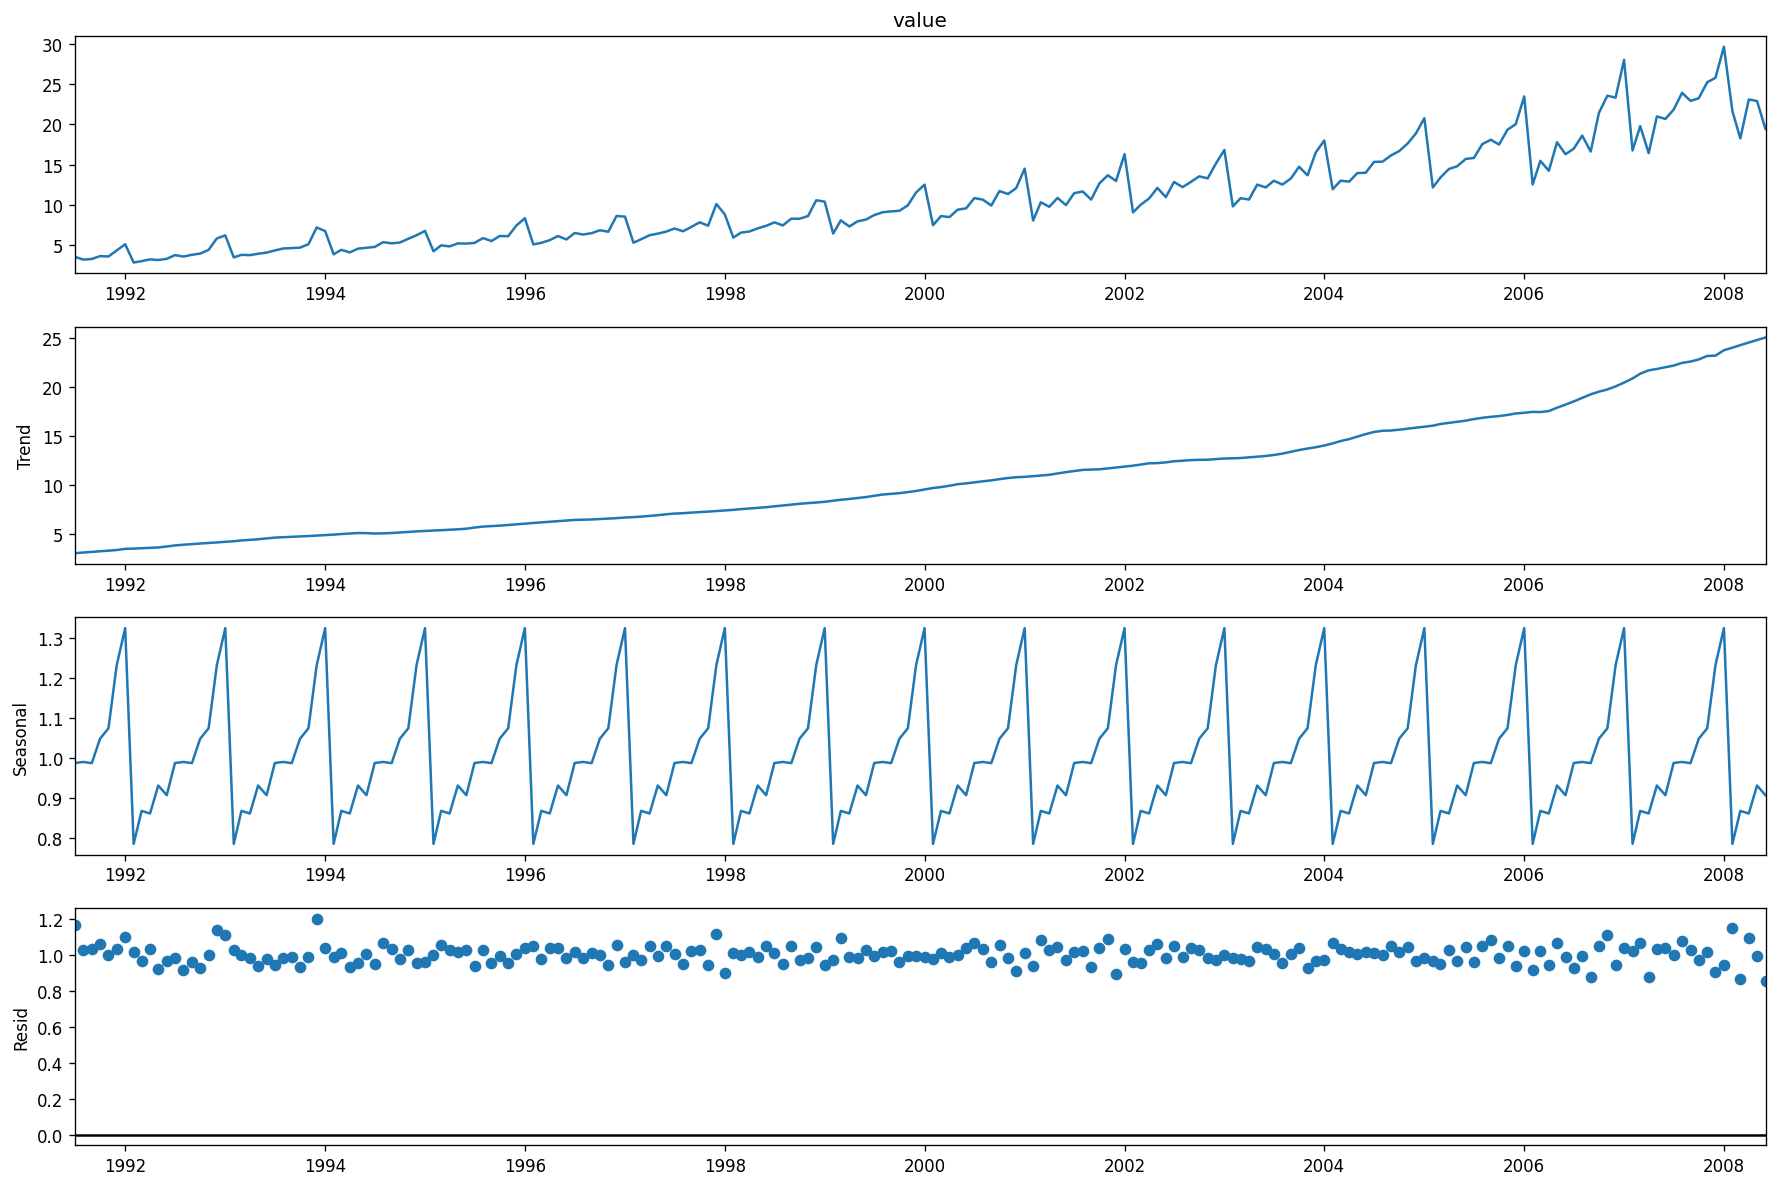

In [63]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (15,10)})
result_mul.plot()
plt.show()

### Additive time series:
### Value = Base Level + Trend + Seasonality + Error

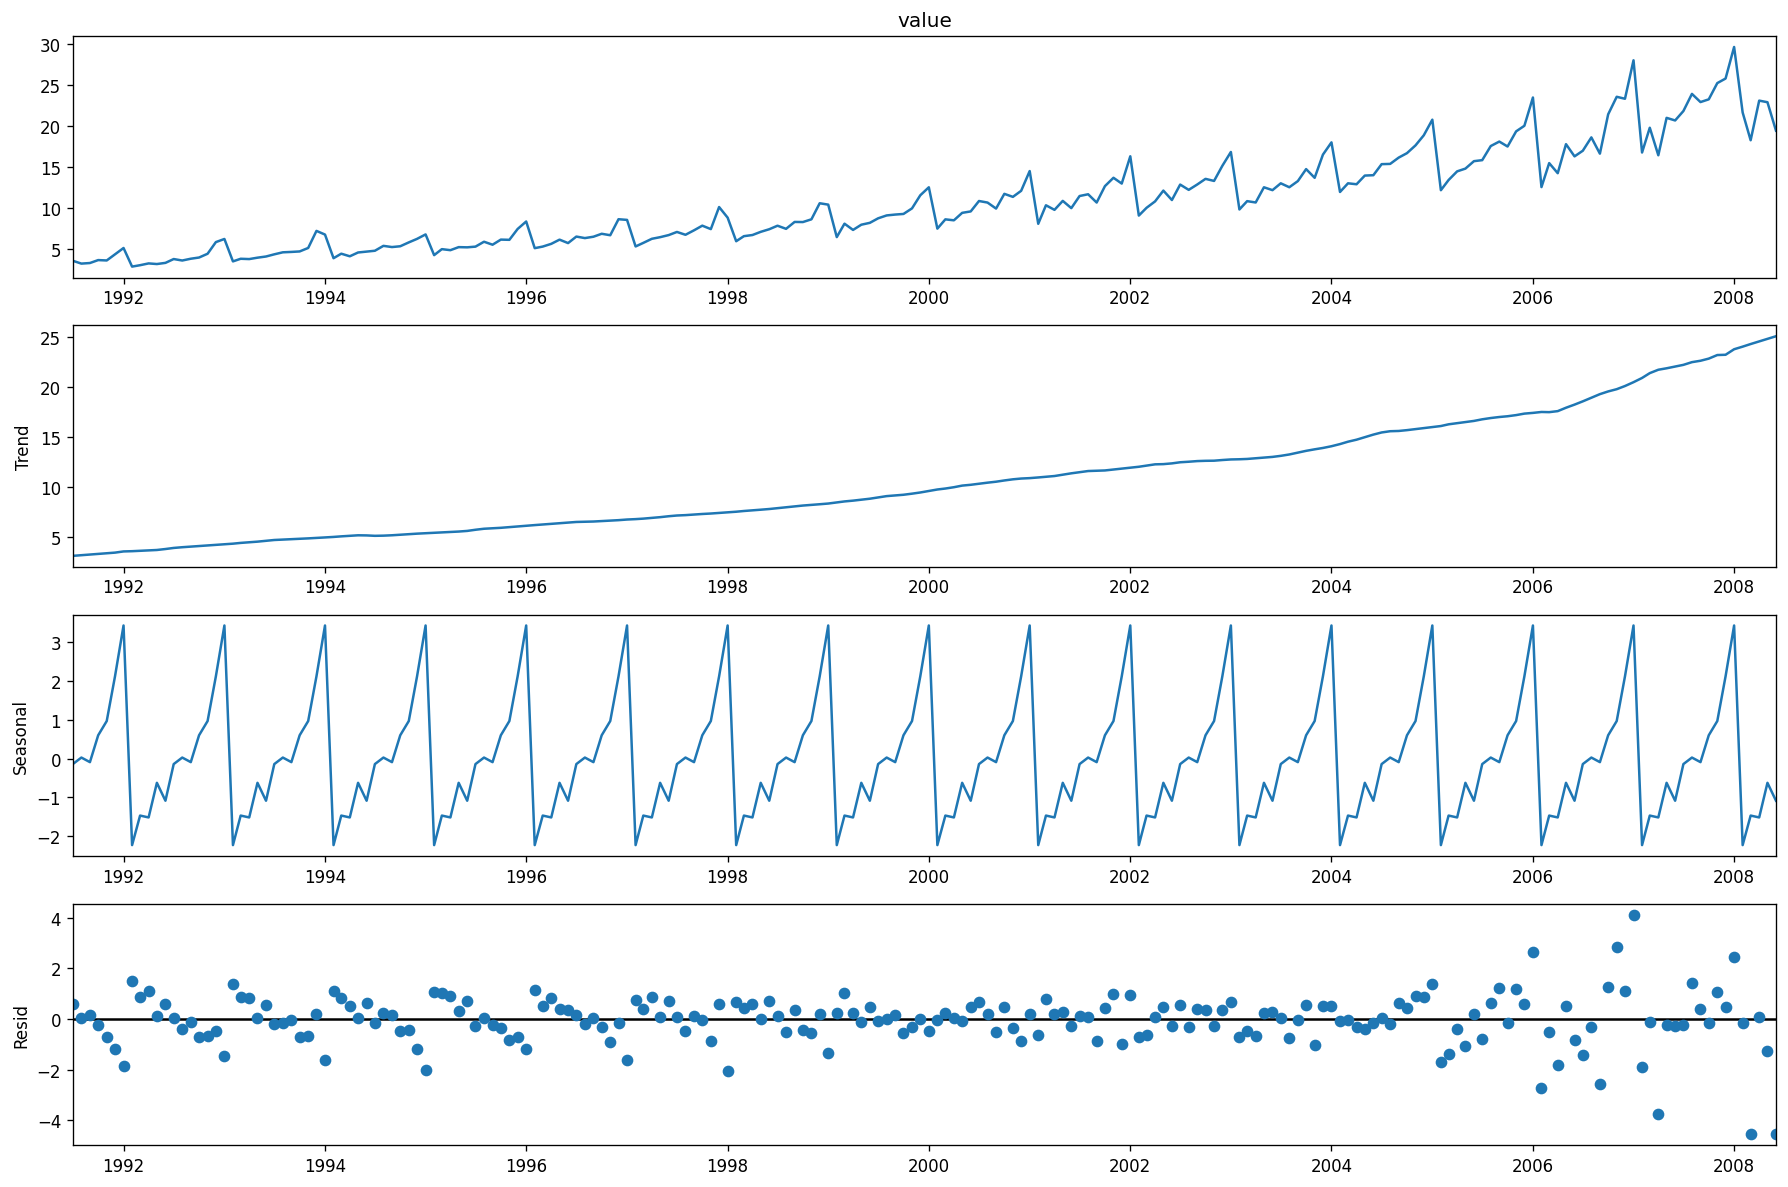

In [64]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (15,10)})
result_add.plot()
plt.show()

In [65]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['season', 'trend', 'resid', 'actual']
df_reconstructed.head()

,season,trend,resid,actual
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


### Stationarity of a time series.
#### A stationary series is one where the values of the series is not a function of time.

#### Forecasting a stationary series is relatively easy and the forecasts are more reliable.
#### The statistical properties of the series like mean, variance and autocorrelation are constant over time.
#### Autocorrelation of the series is the correlation of the series with its previous values.


### Check the stationarity
#### ADF test, where assumed that the time series possesses is non-stationary if the P-Value is greater than the significance level

#### KPSS test, where assumed that the time series possesses is stationary and the P-Value interpretation is just the opposite of ADH test

In [66]:
from statsmodels.tsa.stattools import adfuller, kpss

In [67]:
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [68]:
# KPSS Test
result = kpss(df.value.values, regression='c')
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Detrending a time series is to remove the trend component from a time series.

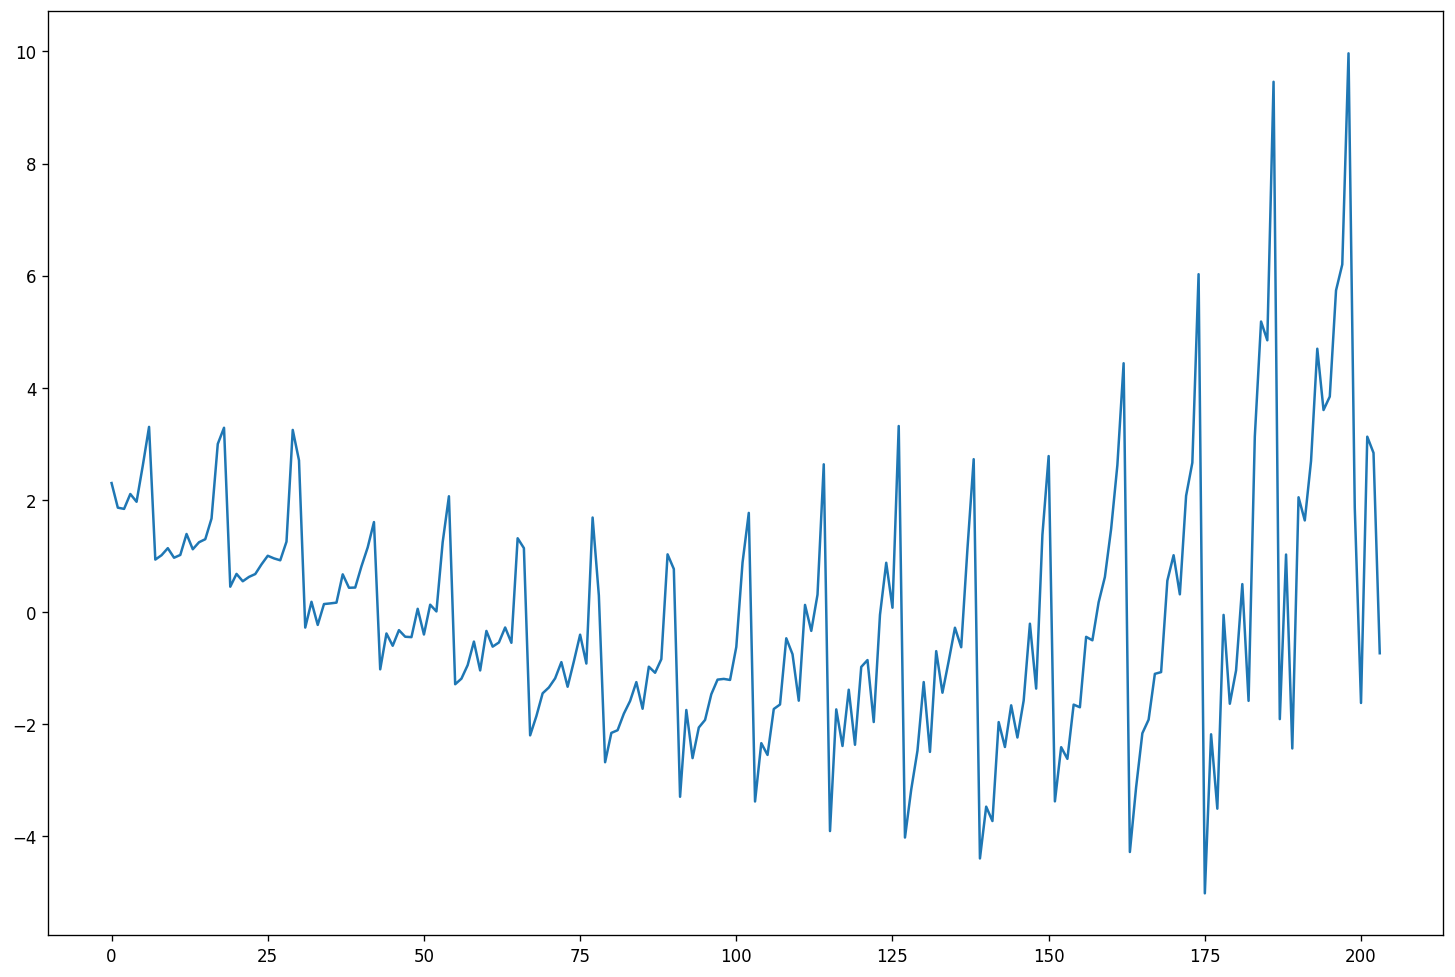

In [69]:
# Using scipy: Subtract the line of best fit
# (The line of best fit may be obtained from a linear regression model with the time steps as the predictor.)

from scipy import signal
detrended = signal.detrend(df.value.values)
plt.plot(detrended)

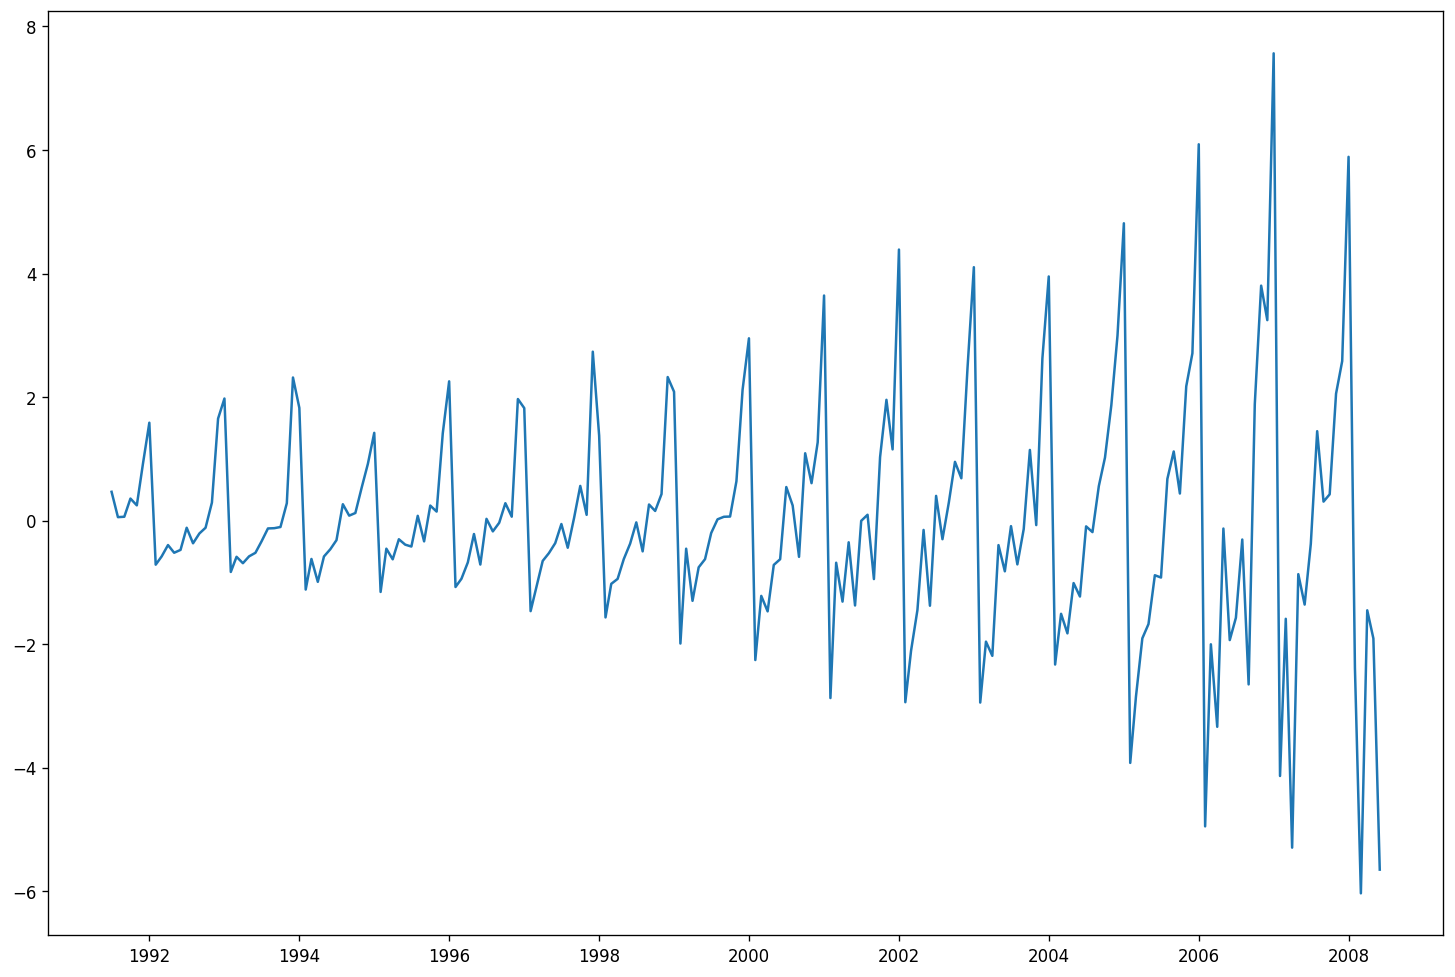

In [70]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)

## Test for seasonality of a time series

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

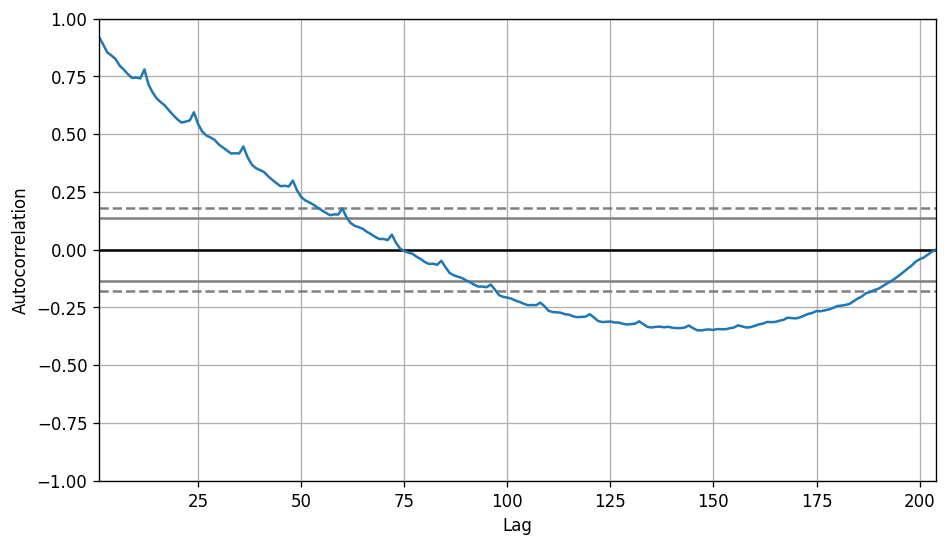

In [71]:
# use the Autocorrelation Function (ACF) plot
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

## Deseasonalize a time series:

### Take a moving average with length as the seasonal window. This will smoothen in series in the process.

### Seasonal difference the series (subtract the value of previous season from the current value)

### Divide the series by the seasonal index obtained from STL decomposition

[]

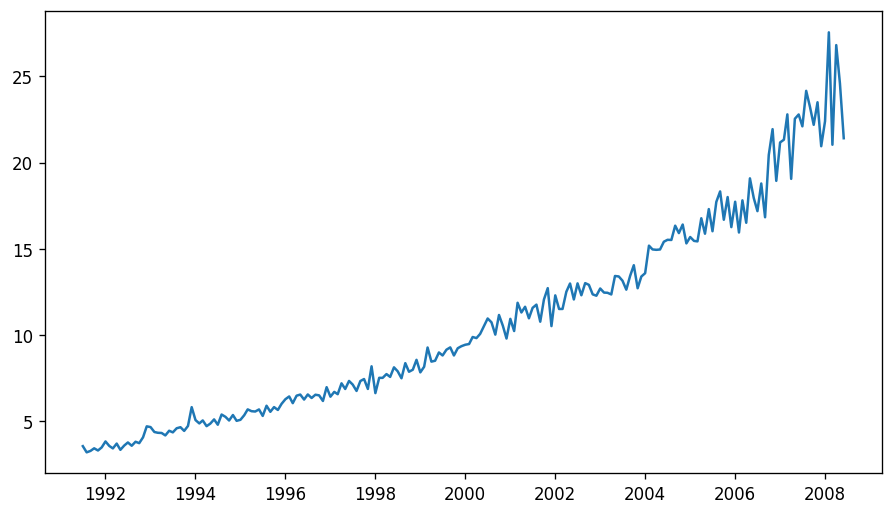

In [72]:
# Subtracting the Trend Component.

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.plot()